## Librery yang digunakan

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl 

## Load Dataset

In [2]:
diabetes_dataset = pd.read_csv('diabetes_prediction_dataset.csv')


In [3]:
diabetes_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diabetes_dataset.shape

(100000, 9)

In [5]:
diabetes_dataset['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [6]:
print(diabetes_dataset.isnull().sum())


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


## Preprocessing (Pra-pemrosesan Data)

In [7]:
# Mengonversi Gender menjadi numerik
diabetes_dataset['gender'] = diabetes_dataset['gender'].map({'Male': 1, 'Female': 0})

# Mengonversi smoking_history menjadi numerik
diabetes_dataset['smoking_history'] = diabetes_dataset['smoking_history'].map({
    'No Info': 0,
    'never': 1,
    'former': 2,
    'not current': 3,
    'current': 4
})

In [8]:
# Mengisi nilai yang hilang pada kolom numerik dengan median
numerical_columns = diabetes_dataset.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='median')
diabetes_dataset[numerical_columns] = imputer.fit_transform(diabetes_dataset[numerical_columns])

In [9]:
# Memisahkan fitur dan target
X = diabetes_dataset.drop('diabetes', axis=1)
y = diabetes_dataset['diabetes']

## Bagi Dataset

In [10]:
# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
import joblib

# Simpan scaler ke dalam file scaler.sav
joblib.dump(scaler, 'scaler.sav')


['scaler.sav']

## Membangun & Melatih Model

In [11]:
# Membangun dan melatih model
models = {
    'Logistic Regression': LogisticRegression(max_iter=300),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

# Melatih model dan menyimpan hasil
predictions = {}
results = []  # List untuk menyimpan hasil ke Excel
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilitas untuk ROC
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_result = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Menyimpan hasil ke dictionary
    predictions[name] = {
        'predictions': y_pred,
        'accuracy': accuracy,
        'classification_report': classification_report_result,
        'confusion_matrix': conf_matrix,
        'y_proba': y_proba,  # Simpan probabilitas untuk ROC
        'auc': auc
    }
    
    # Menyimpan hasil ke dalam list
    results.append({
        'Model': name,
        'Akurasi': accuracy,
        'AUC': auc,
        'Confusion Matrix': conf_matrix.flatten()  # Rata-rata confusion matrix
    })
    

## Cek Hasil

=== Hasil Prediksi Pasien ===
Logistic Regression:
Akurasi: 0.96
Classification Report:
{'0.0': {'precision': 0.9655576882064406, 'recall': 0.9910255007113933, 'f1-score': 0.978125843910343, 'support': 9137.0}, '1.0': {'precision': 0.8681672025723473, 'recall': 0.6257242178447276, 'f1-score': 0.7272727272727273, 'support': 863.0}, 'accuracy': 0.9595, 'macro avg': {'precision': 0.9168624453893939, 'recall': 0.8083748592780604, 'f1-score': 0.8526992855915352, 'support': 10000.0}, 'weighted avg': {'precision': 0.9571528892962183, 'recall': 0.9595, 'f1-score': 0.9564772199445167, 'support': 10000.0}}


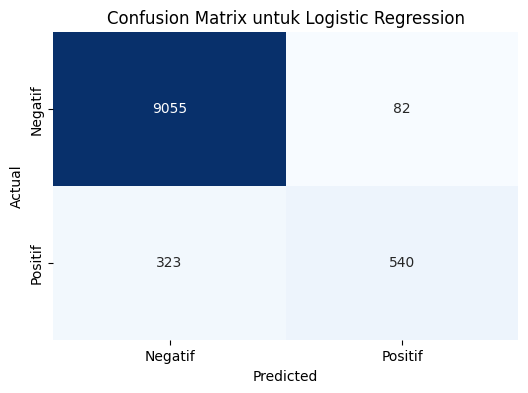

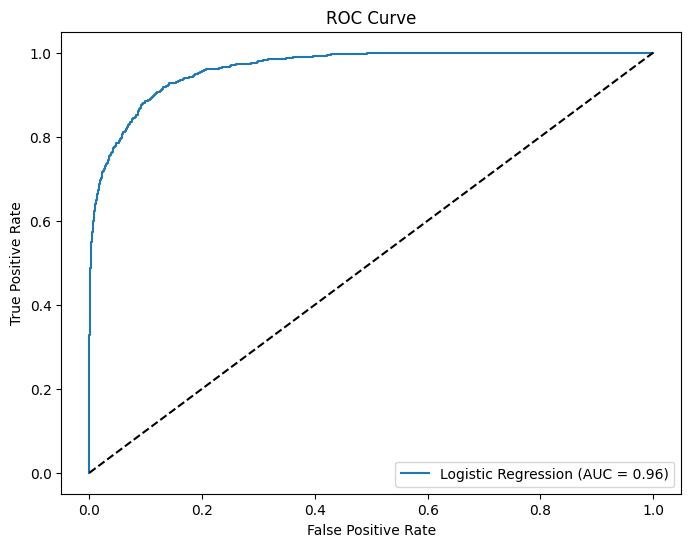

Random Forest:
Akurasi: 0.97
Classification Report:
{'0.0': {'precision': 0.9722400170830664, 'recall': 0.9966072014884535, 'f1-score': 0.9842728206236826, 'support': 9137.0}, '1.0': {'precision': 0.9511041009463722, 'recall': 0.6987253765932793, 'f1-score': 0.8056112224448898, 'support': 863.0}, 'accuracy': 0.9709, 'macro avg': {'precision': 0.9616720590147193, 'recall': 0.8476662890408664, 'f1-score': 0.8949420215342863, 'support': 10000.0}, 'weighted avg': {'precision': 0.9704159875204698, 'recall': 0.9709, 'f1-score': 0.9688543247008529, 'support': 10000.0}}


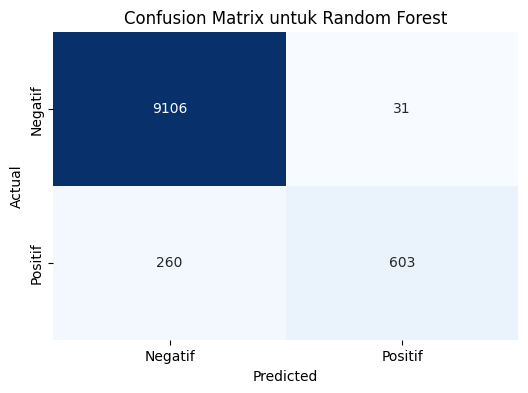

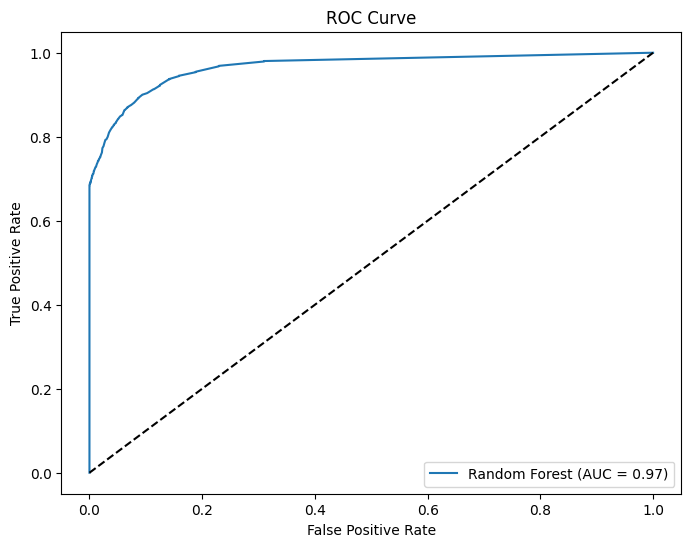

SVM:
Akurasi: 0.96
Classification Report:
{'0.0': {'precision': 0.9622482336813245, 'recall': 0.9986866586406917, 'f1-score': 0.9801288936627283, 'support': 9137.0}, '1.0': {'precision': 0.97678916827853, 'recall': 0.5851680185399768, 'f1-score': 0.7318840579710145, 'support': 863.0}, 'accuracy': 0.963, 'macro avg': {'precision': 0.9695187009799273, 'recall': 0.7919273385903343, 'f1-score': 0.8560064758168714, 'support': 10000.0}, 'weighted avg': {'precision': 0.9635031163370633, 'recall': 0.963, 'f1-score': 0.9587053643425334, 'support': 10000.0}}


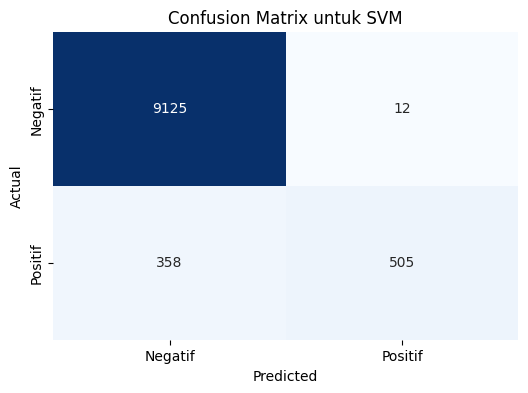

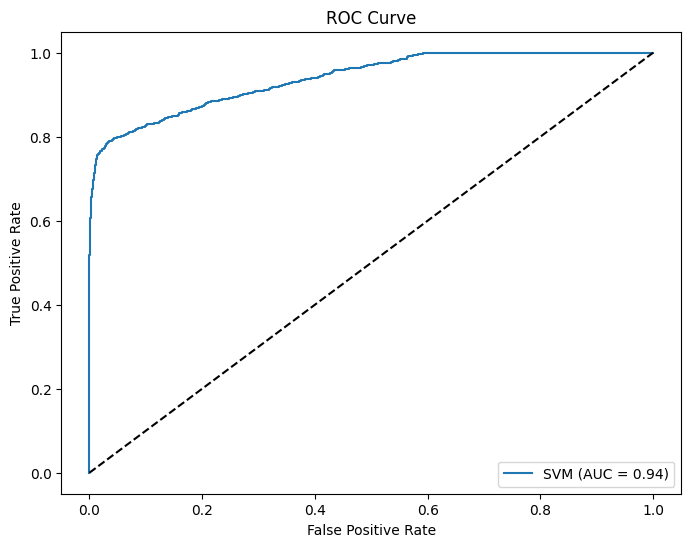


Hasil prediksi telah disimpan ke dalam file 'hasil_prediksi_model.xlsx'


In [12]:
# Menampilkan hasil prediksi
print("=== Hasil Prediksi Pasien ===")
for model_name, result in predictions.items():
    print(f"{model_name}:")
    print(f"Akurasi: {result['accuracy']:.2f}")
    print("Classification Report:")
    print(result['classification_report'])

    # Menampilkan confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.title(f'Confusion Matrix untuk {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Menghitung ROC Curve
    fpr, tpr, _ = roc_curve(y_test, result['y_proba'])

    # Menampilkan ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["auc"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    # Menyimpan hasil ke dalam file Excel
results_df = pd.DataFrame(results)
results_df.to_excel('hasil_prediksi_model_0.6.xlsx', index=False)

print("\nHasil prediksi telah disimpan ke dalam file 'hasil_prediksi_model.xlsx'")

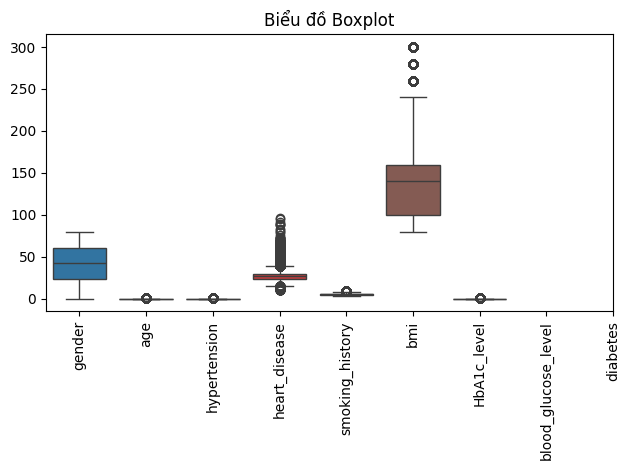

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset diabetes
diabetes_dataset = pd.read_csv('diabetes_prediction_dataset.csv')  # Pastikan path ke file CSV benar

# Membuat boxplot
sns.boxplot(data=diabetes_dataset)
plt.xticks(range(len(diabetes_dataset.columns)), diabetes_dataset.columns, rotation=90)
plt.title("Biểu đồ Boxplot")

# Menyesuaikan layout dan menampilkan diagram
plt.tight_layout()
plt.show()


## Testing

In [20]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Data input yang ingin diuji
input_data = {
    'gender': [0],  # Female: 0, Male: 1
    'age': [19.0],
    'hypertension': [0],
    'heart_disease': [0],
    'smoking_history': [1],  # No Info: 0, Never: 1, Former: 2, Not Current: 3, Current: 4
    'bmi': [24.46],
    'HbA1c_level': [6.0],
    'blood_glucose_level': [159]
}

# Membuat DataFrame dari input_data
new_data = pd.DataFrame(input_data)

# Normalisasi data input
new_data_scaled = scaler.transform(new_data)

# Melakukan prediksi dengan semua model
input_predictions = {}
for name, model in models.items():
    pred = model.predict(new_data_scaled)
    input_predictions[name] = pred[0]  # Menyimpan prediksi dalam format 0 atau 1

# Menampilkan hasil prediksi untuk data input
print("\n=== Hasil Prediksi untuk Data Input ===")
for model_name, result in input_predictions.items():
    print(f"{model_name}: {'Positif Diabetes' if result == 1 else 'Negatif Diabetes'}")

# Menampilkan tabel confusion matrix untuk data uji
print("\n=== Confusion Matrix untuk Data Uji ===")
for name, model in models.items():
    # Prediksi pada data uji
    y_pred = model.predict(X_test_scaled)
    
    # Menghitung confusion matrix tanpa data input
    cm_without_input = confusion_matrix(y_test, y_pred)
    
    # Tambahkan prediksi untuk input_data ke dalam daftar prediksi
    y_true_combined = y_test.tolist() + [1 if input_predictions[name] == 1 else 0]  # Tambahkan label input_data
    y_pred_combined = y_pred.tolist() + [input_predictions[name]]  # Tambahkan prediksi input_data
    
    # Hitung confusion matrix dengan data baru
    combined_cm = confusion_matrix(y_true_combined, y_pred_combined)
    
    print(f"\nModel: {name}")
    print("Confusion Matrix:")
    print(combined_cm)



=== Hasil Prediksi untuk Data Input ===
Logistic Regression: Negatif Diabetes
Random Forest: Positif Diabetes
SVM: Negatif Diabetes

=== Confusion Matrix untuk Data Uji ===

Model: Logistic Regression
Confusion Matrix:
[[9056   82]
 [ 323  540]]

Model: Random Forest
Confusion Matrix:
[[9106   31]
 [ 260  604]]

Model: SVM
Confusion Matrix:
[[9126   12]
 [ 358  505]]


## Simpan Model

In [114]:
import pickle
import openpyxl  

In [115]:
# Misalkan models adalah dictionary yang berisi model yang sudah dilatih
for name, model in models.items():
    filename = f'{name}.sav'  # Nama file untuk setiap model
    pickle.dump(model, open(filename, 'wb'))  # Menyimpan model